In [ ]:
!pip install pandas==1.5.3
!pip install xclim

import xclim
from xclim.core.calendar import percentile_doy

import numpy as np
import pandas as pd
import xarray as xr
#from pythia_datasets import DATASETS
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib.dates as mdates



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.7/191.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.0 MB/s eta 0:

In [ ]:
!pip install cartopy
import cartopy
import cartopy.crs as ccrs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 73.5 MB/s eta 0:00:00


In [ ]:
#here we upload the file with the data
#data samples from ERA5, "file_sample.nc" and "data_sample_91_20.nc" were used
#the data select has as a variable the air temperature at 00 UTC per day
uploaded = files.upload()

Saving data_sample_91_20.nc to data_sample_91_20.nc


Q1. What was the global distribution of the near-surface temperature anomaly in 2020? Hint: using reanalysis data, calculate the annual climatology for the period 1991-2020, then calculate the anomaly by subtracting the climatology from the 2020 annual temperature and plot the distribution of the anomaly.



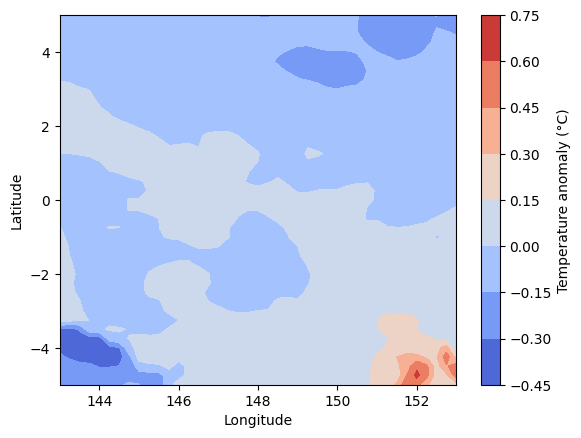

In [ ]:
"""
Author: Wil Laura
Date: March 22, 2024
Description: This script answers Q1; however, please note that the time range and
the selected area may be different.
"""

#The first thing we must do is read the data, in this case ERA5 reanalysis dataset
filepath = "/content/file_sample.nc"
ds = xr.open_dataset(filepath)

#Select the climate period from 1991 to 2020 to calculate the annual mean
climat_period = ds.t2m.loc["1991-01-01":"2000-12-31",:,:]

#calculate the mean of the climate period
average_period = climat_period.mean(dim="time")

#calculate the annual average of the year selected
year_to_use = ds.t2m.loc["2000-01-01":"2000-12-31",:,:].mean(dim="time")

#calculate the anomaly of the selected year
anomaly = year_to_use - average_period

#generate figure
plt.figure()
plt.contourf(anomaly.longitude, anomaly.latitude, anomaly, cmap="coolwarm")
plt.colorbar(label="Temperature anomaly (\N{degree sign}C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


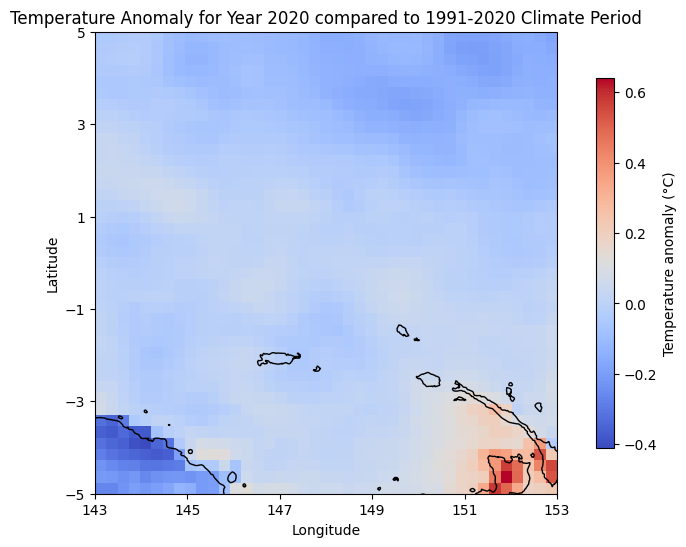

In [ ]:
#In case you want to visualize the coastline, the figure can be implemented
#like this:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

#Plot temperature anomaly
extent = [anomaly.longitude.min(), anomaly.longitude.max(), anomaly.latitude.min(),
          anomaly.latitude.max()]
im = ax.imshow(anomaly, extent=extent, transform=ccrs.PlateCarree(),
               cmap="coolwarm")

#Add coastlines and continent boundaries
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')

#Create colorbar and set label
cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.8)
cbar.set_label('Temperature anomaly (°C)')

#Set xlabel and ylabel
plt.xlabel("Longitude")
plt.ylabel("Latitude")

#Set xticks and yticks
ax.set_xticks(range(int(anomaly.longitude.min()), int(anomaly.longitude.max()) + 1, 2))
ax.set_yticks(range(int(anomaly.latitude.min()), int(anomaly.latitude.max()) + 1, 2))

plt.title("Temperature Anomaly for Year 2020 compared to 1991-2020 Climate Period")
plt.show()

Q2. What is the trend of global mean land temperature over the last 50 years? Hint: generate a time series of only the annual land values and do not forget weight the data since we are using a global scale.

/usr/local/lib/python3.10/dist-packages/xarray/core/groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


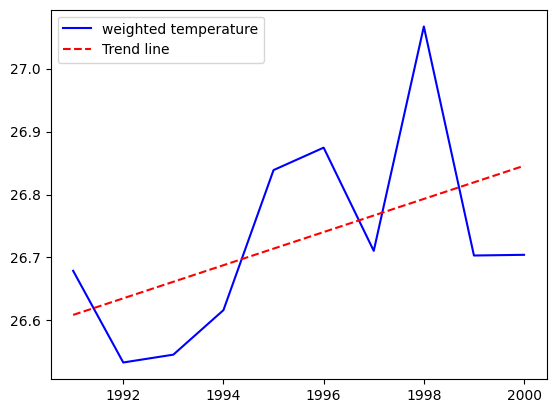

In [ ]:
"""
Author: Wil Laura
Date: March 22, 2024
Description: This script answers Q2; however, please note that the time range and
the selected area may be different.
"""

#We read the data, in this case ERA5 reanalysis dataset
filepath = "/content/file_sample.nc"
ds = xr.open_dataset(filepath)

#find the last year of the dataset
last_year = ds['time.year'].max().item()

#filter the last 50 years
ds_50y =ds.sel(time=slice(str(last_year-50+1),str(last_year)))

#calculate the mean temperature for each year
mean_time_dim = ds_50y['t2m'].resample(time="Y").mean(dim="time")

#Now, you have to take into account we are making a global calculation so the size of the cell vary
#Thus, we need to weighted the data

# Calculate the cosine of latitude
weights = np.cos(np.deg2rad(mean_time_dim.latitude))

# Apply cosine of latitude as weights to the dataset variables
weighted_mean_time_dim = mean_time_dim.weighted(weights)

#calculate the global mean
weighted_global_mean_temp = weighted_mean_time_dim.mean(dim=["longitude","latitude"])

#change the unity of the variable, from Kelvin to degrees Celsius
weighted_global_mean_temp_c = weighted_global_mean_temp - 273.5

# Calculate the trend line using linear regression
years = weighted_global_mean_temp_c['time'].dt.year.values
annual_temperature = weighted_global_mean_temp_c.values
trend_coefficients = np.polyfit(years, annual_temperature, 1)
trend_line = np.poly1d(trend_coefficients)

#generate figure
plt.plot(years, annual_temperature, color="blue")
plt.plot(years, trend_line(years), color="red", linestyle="--", label='Trend line')
plt.legend(["weighted temperature", "Trend line"])


Q3. Identify events with heatwave conditions that occurred in a summer for a local area (select geographic coordinates)? Hint: Let's say that a heatwave is identified when for at least 3 consecutive days the air temperature is above the 90th percentile of the calendar day. First, we have to calculate the daily percentile of a climate period (1991-2020). Then subtract the threshold from the day's temperature and identify where there are three consecutive days with positive values.


In [ ]:
"""
Author: Wil Laura
Date: March 22, 2024
Description: This script answers Q3; however, please note that the time range and
the selected area may be different.
"""

#We need to read the ERA5 reanalysis data
filepath = "/content/data_sample_91_20.nc"
ds = xr.open_dataset(filepath)

#select geographic coordinates
selected_cell = ds.sel(latitude=-77, longitude=-5, method='nearest')

#calculate the threshold to identify a day with heatwave, daily percentile 90 with window size of 15 days
#A note here about percentiles, taking into account the variation between days.
#the daily percentile should be smoothed, one way is to calculate a 15-day moving window
percentiles_90 = percentile_doy(selected_cell.t2m, per=90, window=15)

#we want to know the heatwaves for 2019-2020 summer, for that reason we select that time period
#be aware in this case the data is located in the souther hemisphere
Temp_sel = selected_cell.t2m.sel(time=slice("2019-12-01","2020-02-29"))

#We need to substract both dataset to see if the temperature of the day is
#higher or lower than its percentile 90
data_summer = Temp_sel - percentiles_90.sel(dayofyear=Temp_sel.time.dt.dayofyear)
data_summer = data_summer.squeeze()

#change the dimension of Temp_sel, transformed to dataframe and merge it
data_summer_cal = data_summer.to_dataframe(name="Diff_temp")
data_summer_cal = data_summer_cal.reset_index()

#create a mask to filter the days with heatwave conditions
#A mask that fullfill the conditions of 3 consecutives days as minimum to identify the event
mask = ((data_summer_cal['Diff_temp'] > 0) &
          (data_summer_cal['Diff_temp'].shift(-1) > 0) &
           (data_summer_cal['Diff_temp'].shift(-2) > 0))

# update the mask to set the two values after each True to True
true_indices = np.where(mask)[0]
for index in true_indices:
    if index < len(mask) - 2:
        mask[index + 1:index + 3] = True

#we can locate the days with heatwaves using the mask
print(data_summer_cal[mask])

#finally we can generate a timeseries figure to locate the heatwaves
#convert datetime values to timestamps
timestamps = mdates.date2num(data_summer_cal['time'])

#generate timeseries figure
ax = data_summer_cal.plot(x="time", y="Diff_temp")
ax.axhline(y=0, color='r', linestyle='--')
ax.fill_between(timestamps, data_summer_cal['Diff_temp'], 0,
                where=mask, color='red', alpha=0.3)
plt.show()

<xarray.Dataset> Size: 39MB
Dimensions:    (longitude: 21, latitude: 21, time: 10958)
Coordinates:
  * longitude  (longitude) float32 84B -80.0 -79.75 -79.5 ... -75.5 -75.25 -75.0
  * latitude   (latitude) float32 84B 0.0 -0.25 -0.5 -0.75 ... -4.5 -4.75 -5.0
  * time       (time) datetime64[ns] 88kB 1991-01-01 1991-01-02 ... 2020-12-31
Data variables:
    t2m        (time, latitude, longitude) float64 39MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-20 03:51:34 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Q4. What is the percentage of a region under heatwaves during the 2020?  Hint: use reanalysis data and the method applied by Silva et al., 2022 can be used to reduce the spatial and temporal dimensions of heatwaves into a single one.
*This question is a yellow one*






In [ ]:
"""
Author: Wil Laura
Date: March 22, 2024
Description: This script answers Q4; however, please note that the time range and
the selected area may be different.
"""

#Import data and be careful when selecting the region as it may delay the processing
filepath = "/content/data_sample_91_20.nc"
ds = xr.open_dataset(filepath)

#We used the methodology described in Silva et al.2020 to calculate the percentage of heatwaves
#Link to donwload the study -> https://doi.org/10.1016/j.jenvman.2022.116193

#First step, calculate percentile 90 with window size of 15 days
percentiles_90 = percentile_doy(ds.t2m, per=90, window=15)

#extract variable and dimensiones of lat and lon
lat=np.array(ds.variables['latitude'][:])
lon=np.array(ds.variables['longitude'][:])

#we calculated the heatwaves for 2020 year
Temp_sel = ds.t2m.sel(time=slice("2020-01-01","2020-12-31"))

#sort dimensions of the xarray percentiles_90
arr_transposed = percentiles_90.transpose("dayofyear","latitude", "longitude","percentiles")

#remove single-dimensional of percentile from the xarray shape
#we got a xarray with dimensions ("dayofyear","latitude", "longitude")
percentiles_90_rs =  arr_transposed.squeeze()

#create two masks of zeros with the same shape of your temperature array
daysHW = np.zeros_like(Temp_sel)
daysHW2 = np.zeros_like(Temp_sel)

#compare the temperature day with its threshold for each cell
for t in range(Temp_sel.shape[0]):
        for i in range(Temp_sel.shape[1]):
            for j in range(Temp_sel.shape[2]):
                if Temp_sel[t,i,j] >= percentiles_90_rs[t,i,j]:
                    daysHW[t,i,j]=t;
                    daysHW2[t,i,j]=t

#find days with 3 consecutive hot days using conditions
for t in range(1,Temp_sel.shape[0]-1):
        for i in range(Temp_sel.shape[1]):
            for j in range(Temp_sel.shape[2]):
                if daysHW[t-1,i,j]==0 and daysHW[t,i,j] >0 and daysHW[t+1,i,j]==0:
                    daysHW2[t,i,j]=0

for t in range(1,Temp_sel.shape[0]-2):
        for i in range(Temp_sel.shape[1]):
            for j in range(Temp_sel.shape[2]):
                if daysHW[t-1,i,j]==0 and daysHW[t,i,j] >0 and daysHW[t+2,i,j]==0:
                    daysHW2[t,i,j]=0;
                    daysHW2[t+1,i,j]=0

daysHW.sum()
daysHW2.sum()

#Compute the percentage of the region under heatwaves

pixels_total=Temp_sel.shape[0]*Temp_sel.shape[1]*Temp_sel.shape[2];
pixelsHW_TOTAL90pct=np.zeros_like(Temp_sel);
percentage_region_under_HW=np.zeros(1)

for t in range(1,Temp_sel.shape[0]):
        for i in range(Temp_sel.shape[1]):
            for j in range(Temp_sel.shape[2]):
                if daysHW2[t,i,j]>0 and np.isnan(daysHW2[t,i,j])==False:
                    pixelsHW_TOTAL90pct[t,i,j]=1;

percentage_region_under_HW=round(np.nansum(pixelsHW_TOTAL90pct[:,:,:])/pixels_total*100,1);

print("The percentage of the region under heatwaves during 2020 was: ",
      percentage_region_under_HW, "%", sep="")


The percentage of the region under heatwaves during 2020 was: 9.1%
